Algorithm 1 Constructing a simplicial complex filtered by a multidimensional dissimilarity measure.

Input: Point cloud P, measure dsim, eps, maximal dimension dim
Output: Filtered complex K

(K0, K1) := graph over P weighted by dsim

Let nr(v) be the unique index of each vertex v ∈ K0.
for d = 2. . . dim do
Kd = ∅
    for each d-simplex S in Kd−1 do
        for each vertex e adjacent to any vertex of S do
            if nr(e) > maxv∈S{nr(v)} {Note that each simplex is created and added
                                    only once and that e /∈ S.} 
                then N = S ∪ e {N is a new d+1 simplex.}
                if dsim(N) ≤ eps 
                then Kd = Kd ∪ N {All faces of N are already in K. }
return K = (K0, . . . , Kdim)

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
from matplotlib.collections import LineCollection as lc

In [9]:
#x=lambda : rnd.gauss(0,5)
#y=rnd.randrange(0,1,100)
#x=np.array(np.arange(1,10))
#y=np.array(np.ones((1,len(x)),int)*2)
m=np.random.randint(low=1,high=6,size=(2,3))
x=m[0]
y=m[1]
print(m,x,y,sep="\n")

[[5 1 2]
 [3 4 4]]
[5 1 2]
[3 4 4]


In [12]:
def dsim(x,y):
    t=x[:,None]
    yt=y[:,None]
    q=np.sqrt((x-t)**2+(y-yt)**2)
    print(t,yt,x-t,y-yt,sep="\n")
    return q
dsim(x,y)


[[5]
 [1]
 [2]]
[[3]
 [4]
 [4]]
[[ 0 -4 -3]
 [ 4  0  1]
 [ 3 -1  0]]
[[ 0  1  1]
 [-1  0  0]
 [-1  0  0]]


array([[0.        , 4.12310563, 3.16227766],
       [4.12310563, 0.        , 1.        ],
       [3.16227766, 1.        , 0.        ]])

In [18]:

def dsim(m):
    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)
print(dsim(m))



[[0.         4.12310563 3.16227766]
 [4.12310563 0.         1.        ]
 [3.16227766 1.         0.        ]]


In [223]:
edsim=dsim(m)
edsimSort=np.unique(np.sort(np.insert(edsim.reshape(-1),[1],[5.6,7.3,9.9],0)))[1:]
edsQ3=edsimSort[3*(len(edsimSort)-1)//4]
print(edsimSort,edsQ3,sep="\n")

[1.         3.16227766 4.12310563 5.6        7.3        9.9       ]
5.6


In [306]:

ddsim=[]
for i in range(edsim.shape[0]):
  ddsim.append(np.delete(edsim[i], np.s_[i::],0))
ddsimArray=np.concatenate(ddsim[::],dtype='object')
ddIns=np.sort(np.insert(ddsimArray,[1],[5.6,7.3,9.9],0))
ddQ3=ddIns[3*(len(ddIns)-1)//4]
print(ddsimArray, ddIns,ddQ3,sep="\n")


[4.123105625617661 3.1622776601683795 1.0]
[1.0 3.1622776601683795 4.123105625617661 5.6 7.3 9.9]
5.6


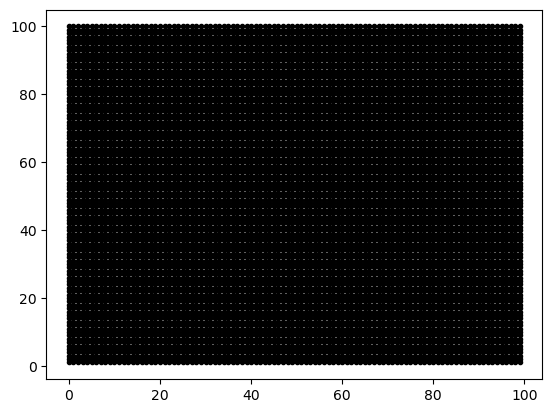

In [56]:
xray=np.linspace(1,100,100)
line=np.ones(100)
#print(xray[:,None])
plt.plot(xray*line[:,None],'k.')
plt.show()

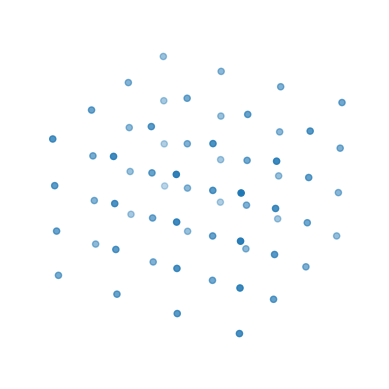

In [317]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x=np.linspace(0,100,4)
y=np.copy(x)
z=np.copy(x)

X,Y,Z=np.meshgrid(x,y,z,indexing='ij')
ax.scatter3D(X,Y,Z)
plt.axis("off")
plt.show()

0.7927507915757459
[[0 2]
 [0 3]
 [0 5]
 [0 8]
 [0 9]
 [1 2]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [2 3]
 [2 5]
 [2 8]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 5]]



[[0.88789023 0.53060996 0.99784107 0.74432017 0.14474975 0.25161128
  0.05441835 0.17512271 0.27094155 0.16717125]
 [0.91306531 0.0146387  0.65506739 0.87633948 0.49335592 0.75601422
  0.60059111 0.49648588 0.90031048 0.98108863]]
[[(0.8878902289910025, 0.9130653050857213), (0.9978410687035161, 0.6550673896895904)], [(0.8878902289910025, 0.9130653050857213), (0.7443201688359713, 0.8763394770098051)], [(0.8878902289910025, 0.9130653050857213), (0.2516112765907632, 0.7560142231843258)], [(0.8878902289910025, 0.9130653050857213), (0.2709415492892885, 0.9003104757629012)], [(0.8878902289910025, 0.9130653050857213), (0.16717124861715138, 0.9810886280735268)], [(0.5306099569239416, 0.014638700662315096), (0.9978410687035161, 0.6550673896895904)], [(0.5306099569239416, 0.014638700662315096), (0.14474974951535147, 0.4933559242466905)

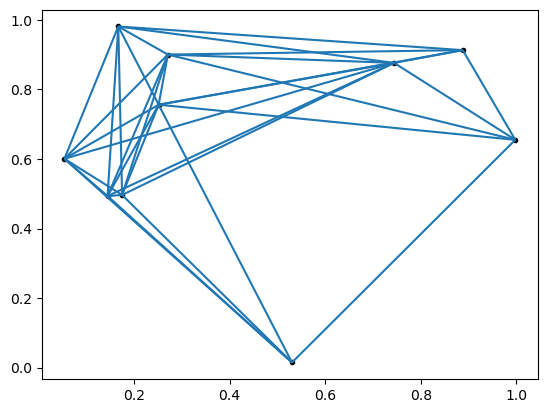

In [417]:
r=np.random.rand(2,10)
#print(r[0],r[1])
rdsim=dsim(r)
#print(rdsim)
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[3*(len(rSort)-1)//4]
print(rQ3)
#plt.plot(r[0],r[1], 'k.')
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)

itop=list(map(lambda x: [(r[0,x[0]],r[1,x[0]]),(r[0,x[1]],r[1,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")



lcs=lc(itop)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.add_collection(lcs)
ax1.autoscale()
ax1.scatter(r[0],r[1],marker='.',c='black')
#plt.show()


0.5309521343506738
[[0 5]
 [0 9]
 [1 2]
 [1 7]
 [2 7]
 [3 4]
 [3 6]
 [4 5]
 [4 6]
 [4 7]
 [5 9]
 [6 8]]



[[0.99936833 0.02666209 0.01504481 0.33224706 0.44904578 0.95609169
  0.16503035 0.40166789 0.16286815 0.96805009]
 [0.25577903 0.763739   0.67472362 0.57356342 0.57351373 0.44322819
  0.4315458  0.88291412 0.07617088 0.09070767]
 [0.10657024 0.77997909 0.69641396 0.24931811 0.36377762 0.45232305
  0.06278213 0.68641103 0.0253668  0.07737348]]
[[(0.9993683331697949, 0.2557790258243977, 0.10657024162363082), (0.9560916861239814, 0.4432281895929404, 0.4523230538081553)], [(0.9993683331697949, 0.2557790258243977, 0.10657024162363082), (0.9680500903057916, 0.09070766666591967, 0.07737347935854033)], [(0.026662089753293094, 0.7637389970272641, 0.7799790854307859), (0.015044814212076707, 0.6747236237738525, 0.6964139566135407)], [(0.026662089753293094, 0.7637389970272641, 0.7799790854307859), (0.4016678931384391, 0.8829141210190553, 0.6864110323252965)], [(0.015044814212076707, 0.674723

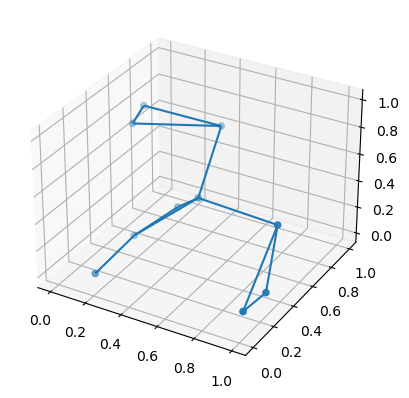

In [435]:
l3c=mplot3d.art3d.Line3DCollection

def dsimN(m):
    '''This function creates a dissimilarity matrix using
     the Euclidean distance metric from a M*N point cloud matrix'''

    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)

r=np.random.rand(3,10)
rdsim=dsimN(r)
#print(rdsim,r,sep="\n\n")
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[(len(rSort)-1)//4]
print(rQ3)
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
#print(splitIndex)
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)
#print(r,izip_,sep="\n\n")
itop=list(map(lambda x: [tuple(r[:,x[0]]),tuple(r[:,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.add_collection(l3c(itop))
ax.scatter3D(r[0],r[1],r[2])

#lcs=lc(itop)
#fig = plt.figure()

#ax1 = plt.axes(projection="3d")
#ax1.add_collection(lcs)
#ax1.autoscale()
#ax1.scatter(r[0],r[1],marker='.',c='black')
plt.show()

47.43261220218461
[[ 0  1]
 [ 0  4]
 [ 0  8]
 [ 0 25]
 [ 0 27]
 [ 0 28]
 [ 0 31]
 [ 0 36]
 [ 0 37]
 [ 0 39]
 [ 0 43]
 [ 0 45]
 [ 0 50]
 [ 0 51]
 [ 0 52]
 [ 0 54]
 [ 0 60]
 [ 0 62]
 [ 0 65]
 [ 0 71]]



[[34.99069329  6.10953167 90.46407465 81.63646051  6.78580971 32.3248028
  21.00205154  2.36759055 35.27324945 92.70686463 15.11340113 64.2573194
  62.38525725 51.34774636 81.43962441 90.19075819 23.02053954 80.92572051
   0.33362971 63.24031366 94.87754586 99.01070133 72.04436458  7.80152283
   0.79441601 18.93596023 65.0119073  68.95892568 19.31469756 96.69800908
  30.56117966 27.2783577  98.13950773 17.60118418 28.744591   70.97407021
  14.68697083 29.20367701 15.73168944 60.93022944 13.29180305 38.02788555
  89.91961145 37.48087954 99.78156836  0.26677143 34.48695178 80.73951481
  98.44540607 77.54437377 59.27193105  2.79888239 74.77200935 73.32750591
  66.98358046 84.42071509 80.16970243 91.85783086 95.93262811 59.41846389
  23.95442405 39.9274046  68.58415348 73.17032113 69.1429912

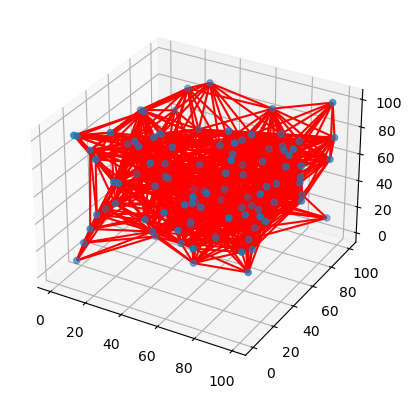

In [439]:
r=np.random.rand(3,100)*100
rdsim=dsimN(r)
#print(rdsim,r,sep="\n\n")
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[(len(rSort)-1)//4]
print(rQ3)
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
#print(splitIndex)
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)
#print(r,izip_,sep="\n\n")
itop=list(map(lambda x: [tuple(r[:,x[0]]),tuple(r[:,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.add_collection(l3c(itop,color="red"))
ax.scatter3D(r[0],r[1],r[2])


plt.show()

2500


(-11.0, 11.0)

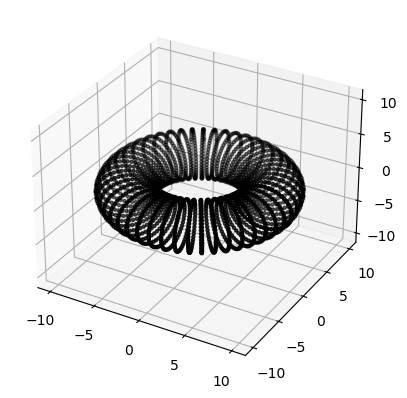

In [102]:

#torus
def torus (n,c=7,a=3,):
    mu=np.linspace(0,2*np.pi,n)
    nu=np.linspace(0,2*np.pi,n)
    mu,nu=np.meshgrid(mu,nu)

    x=(c+a*np.cos(nu))*np.cos(mu)
    y=(c+a*np.cos(nu))*np.sin(mu)
    z=a*np.sin(nu)

    x = x.ravel()
    y = y.ravel()
    z = z.ravel()
    return x,y,z
x,y,z= torus(50)
print(len(x))
fig=plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z,marker='.',color='black')
ax.set_zlim3d(-11,11)

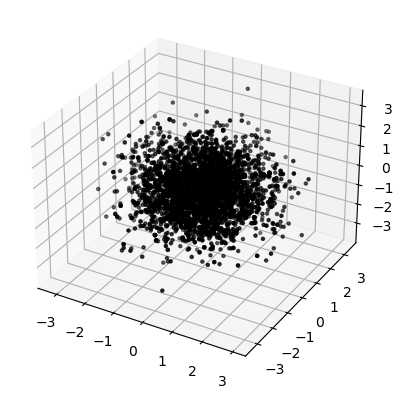

In [74]:

def met(iter,xbound=1,mu=0,sig=1,bcent=0.2,dim=1):
        states=[]
        x=[]

        niter=(iter**dim//(1-bcent))
        burn_in=int(niter*bcent)
        #print(niter,burn_in,niter-burn_in,sep="\n\n")
        #if ((iter-burn_in )% dim!=0):
                #burn_in=burn_in-((iter-burn_in)%dim)

        normalDist= lambda x : (np.exp((-(x-mu)**2)/(2*sig**2)))/(sig * np.sqrt(2*np.pi))
        nextState= lambda x : rnd.uniform(-xbound*sig+mu,xbound*sig+mu)
        unif= lambda : rnd.uniform(0,1)
        c=nextState(xbound)
        for i in range(int(niter)):
            states.append(c)
            m=nextState(xbound)
            cProb=normalDist(c)
            mProb=normalDist(m)
            accept=min(mProb/cProb,1)
            if unif()<=accept:
                c=m
        x=states[burn_in:]
        sqDim=(iter*np.ones(dim,dtype=int))
        #print(sqDim)
        return np.array(x).reshape(sqDim)
x=met(16,xbound=5,dim=3)
y=met(16,xbound=5,dim=3)
z=met(16,xbound=5,dim=3)
#print(len(x),x,sep='\n\n')

#plt.plot(x, np.linspace(0,1,len(x)),'k.')
#plt.show()
fig=plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z,marker='.',color='black')
#ax.set_zlim3d(-11,11)

[10.          9.13545458  6.69130606  3.09016994 -1.04528463 -5.
 -8.09016994 -9.78147601 -9.78147601 -8.09016994 -5.         -1.04528463
  3.09016994  6.69130606  9.13545458 10.          9.74063637  8.89851411
  6.51775792  3.01002218]

[ 0.00000000e+00  4.06736643e+00  7.43144825e+00  9.51056516e+00
  9.94521895e+00  8.66025404e+00  5.87785252e+00  2.07911691e+00
 -2.07911691e+00 -5.87785252e+00 -8.66025404e+00 -9.94521895e+00
 -9.51056516e+00 -7.43144825e+00 -4.06736643e+00 -2.44929360e-15
  0.00000000e+00  3.96187374e+00  7.23870352e+00  9.26389570e+00]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.22020993 1.22020993
 1.22020993 1.22020993]


(-11.0, 11.0)

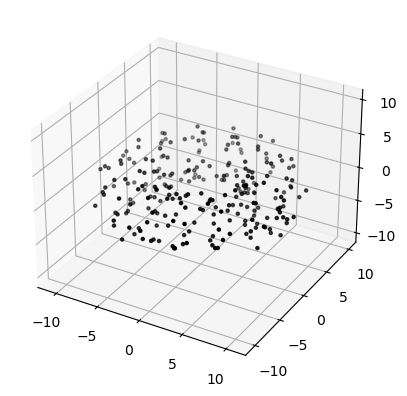

In [109]:

n=16
x,y,z=torus(n)
noise= lambda : met(n**2)

xn=x + noise()
yn=y + noise()
zn=z + noise()

print(x[:20],y[:20],z[:20],sep='\n\n')
fig=plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(xn,yn,zn,marker='.',color='black')
ax.set_zlim3d(-11,11)




[[[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]]

 [[1.5 1.5 1.5]
  [1.5 1.5 1.5]
  [1.5 1.5 1.5]]

 [[3.  3.  3. ]
  [3.  3.  3. ]
  [3.  3.  3. ]]]

[[[0. 0. 0.]
  [2. 2. 2.]
  [4. 4. 4.]]

 [[0. 0. 0.]
  [2. 2. 2.]
  [4. 4. 4.]]

 [[0. 0. 0.]
  [2. 2. 2.]
  [4. 4. 4.]]]

[[[0. 4. 8.]
  [0. 4. 8.]
  [0. 4. 8.]]

 [[0. 4. 8.]
  [0. 4. 8.]
  [0. 4. 8.]]

 [[0. 4. 8.]
  [0. 4. 8.]
  [0. 4. 8.]]]
